(image-segmentation:thresholding)=
# Schwellenwertverfahren
Schwellenwertverfahren ist eine Technik der Bildsegmentierung. Es trennt ein gegebenes Einzelkanal-Bild (oder einen Stapel) in zwei Bereiche: Pixel mit Intensität unterhalb eines gegebenen Schwellenwerts, auch "Hintergrund" genannt, und Pixel mit Intensität oberhalb eines gegebenen Schwellenwerts, "Vordergrund". Typischerweise resultieren diese Algorithmen in Binärbildern, bei denen die Hintergrundintensität 0 und die Vordergrundintensität 1 ist. Bei der Anwendung solcher Algorithmen in ImageJ haben Vordergrundpixel den Wert 255. In scikit-image sind Hintergrundpixel `False` und Vordergrundpixel `True`.

Siehe auch
* [Schwellenwertverfahren (Wikipedia)](https://en.wikipedia.org/wiki/Thresholding_(image_processing))
* [Schwellenwert-Algorithmen in scikit-image](https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_thresholding.html)

In [1]:
from skimage.io import imread
from pyclesperanto_prototype import imshow
import pyclesperanto_prototype as cle

from skimage import filters
from skimage.filters import try_all_threshold
from matplotlib import pyplot as plt
import napari_simpleitk_image_processing as nsitk

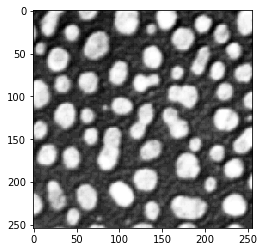

In [2]:
image = imread("../../data/blobs.tif")
imshow(image)

## Bildsegmentierung durch Schwellenwertverfahren
Die [threshold_otsu](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.threshold_otsu) Operation, auch bekannt als Otsu's Methode (Otsu et al., IEEE Transactions on Systems, Man, and Cybernetics, Vol. 9 (1), 1979), liefert eine Zahl - den anzuwendenden Schwellenwert.

In [3]:
threshold = filters.threshold_otsu(image)

Bei der Verwendung von Methoden wie Schwellenwertverfahren in Notebooks wird empfohlen, das Ergebnis auszugeben, um zu sehen, was es tatsächlich zurückgibt. Hier verwenden wir die Methode von scikit-image, die den anzuwendenden Schwellenwert zurückgibt. Das Ausdrucken dieses Schwellenwerts kann später bei der Reproduktion des Workflows hilfreich sein, auch wenn andere den gleichen Schwellenwert auf den Datensatz in anderer Software anwenden möchten.

In [4]:
threshold

120

Mit numpy-Arrays können wir den Schwellenwert anwenden, indem wir den `>=`-Operator verwenden. Das Ergebnis wird ein Binärbild sein.

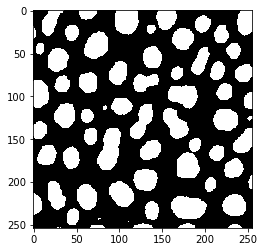

In [5]:
binary_image = image >= threshold

imshow(binary_image)

Wir können auch bestimmen, in welchem Typ das Binärbild verarbeitet wird, indem wir Minimum und Maximum des Bildes ausgeben:

In [6]:
binary_image.max()

True

In [7]:
binary_image.min()

False

Wie bereits gezeigt, erlaubt uns matplotlib, eine Kontur auf ein mit `imshow` visualisiertes Bild zu zeichnen, indem wir den `contour`-Befehl verwenden.

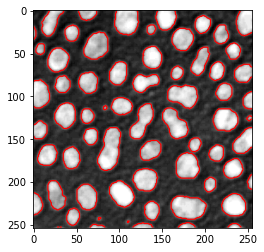

In [8]:
# Erstelle einen neuen Plot
fig, axes = plt.subplots(1,1)

# Füge zwei Bilder hinzu
axes.imshow(image, cmap=plt.cm.gray)
axes.contour(binary_image, [0.5], linewidths=1.2, colors='r')

Es gibt eine Liste von [Schwellenwert-Algorithmen](https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_thresholding.html). Es ist möglich, sie alle auf Ihre Daten anzuwenden und die Unterschiede zu sehen:

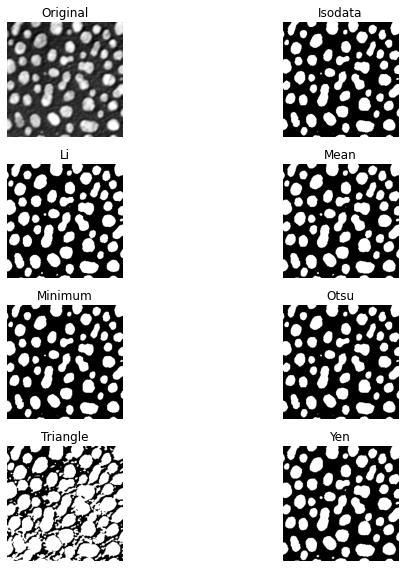

In [9]:
fig, ax = try_all_threshold(image, figsize=(10, 8), verbose=False)
plt.show()

## Schwellenwertverfahren mit pyclesperanto
Darüber hinaus bieten auch andere Bibliotheken wie [pyclesperanto](https://github.com/clesperanto/pyclesperanto_prototype/) Schwellenwert-Algorithmen an. Die Implementierung hier gibt nicht den Schwellenwert zurück, sondern direkt das Binärbild.

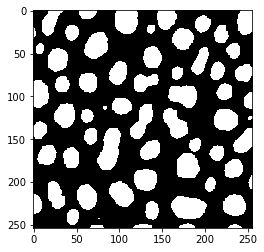

In [10]:
binary_image2 = cle.threshold_otsu(image)
imshow(binary_image2)

Hier können wir auch sehen, dass verschiedene Bibliotheken Binärbilder auf unterschiedliche Weise speichern. pyclesperanto speichert zum Beispiel die positiven Pixel in Binärbildern nicht als `True`, sondern stattdessen mit einer `1`:

In [11]:
binary_image2.max()

1.0

In [12]:
binary_image2.min()

0.0

## Schwellenwertverfahren mit SimpleITK
Auch [SimpleITK](https://simpleitk.readthedocs.io/) bietet Schwellenwert-Algorithmen, die in der [Liste der Filter](https://simpleitk.readthedocs.io/en/master/filters.html) zu finden sind. Für die Skript-Bequemlichkeit verwenden wir hier [napari-simpleitk-image-processing](https://github.com/haesleinhuepf/napari-simpleitk-image-processing), ein skriptbares napari-Plugin, das einige SimpleITK-Funktionen auf zugänglichere Weise anbietet. Wir können eine kleine Schleife programmieren, die alle Schwellenwert-Algorithmen in SimpleITK ausprobiert und uns die Ergebnisse zeigt:

threshold_huang


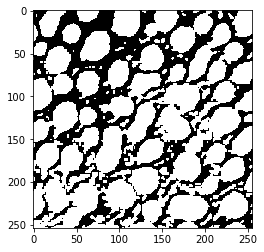

threshold_intermodes


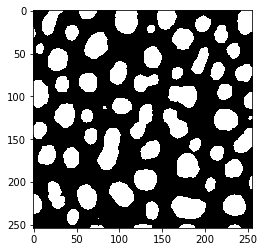

threshold_isodata


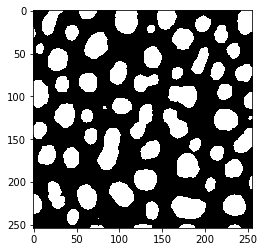

threshold_kittler_illingworth


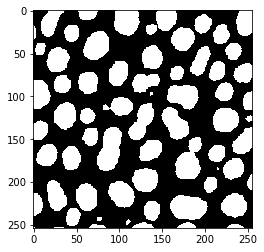

threshold_li


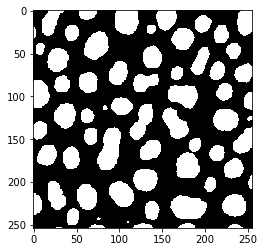

threshold_maximum_entropy


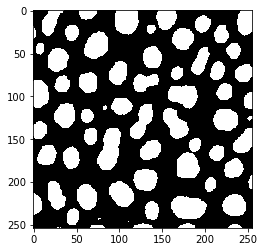

threshold_moments


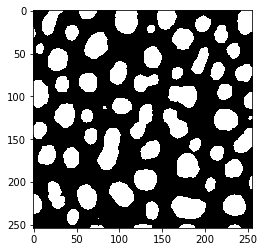

threshold_otsu


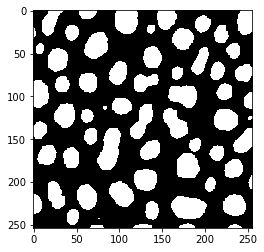

threshold_renyi_entropy


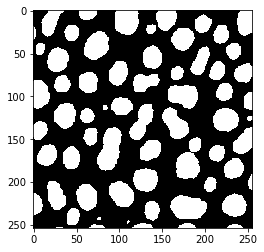

threshold_shanbhag


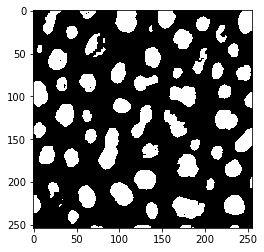

threshold_triangle


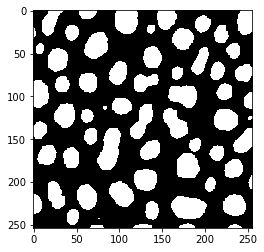

threshold_yen


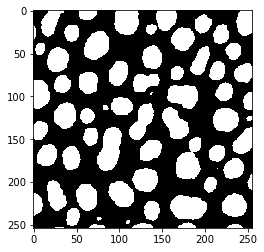

In [13]:
threshold_algorithms = [
    nsitk.threshold_huang,
    nsitk.threshold_intermodes,
    nsitk.threshold_isodata,
    nsitk.threshold_kittler_illingworth,
    nsitk.threshold_li,
    nsitk.threshold_maximum_entropy,
    nsitk.threshold_moments,
    nsitk.threshold_otsu,
    nsitk.threshold_renyi_entropy,
    nsitk.threshold_shanbhag,
    nsitk.threshold_triangle,
    nsitk.threshold_yen
]

for algorithm in threshold_algorithms:
    # Zeige den Namen des Algorithmus über dem Bild
    print(algorithm.__name__)
    
    # Binarisiere das Bild mit dem gegebenen Algorithmus
    binary_image = algorithm(image)
    
    # Zeige das Segmentierungsergebnis
    imshow(binary_image)

# Übung
Segmentieren Sie blobs.tif mit dem Yen-Algorithmus. Verwenden Sie matplotlib, um eine grüne Kontur der segmentierten Objekte um die Regionen auf dem Originalbild zu zeichnen.

Segmentieren Sie das Bild mit einem berechneten Schwellenwert gemäß dieser Gleichung:

In [ ]:
threshold = mean + 2 * standard_deviation

Visualisieren Sie das resultierende Segmentierungsergebnis mit einer roten Kontur auf dem Originalbild und der grünen Kontur von oben.

Alternativ können Sie beide Segmentierungsergebnisse in napari einfügen und dort visuell vergleichen.